<a href="https://colab.research.google.com/github/Raphael-Vargas-Moya/IA/blob/main/Assignments/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6.- Convolutional Neural Network.

* Joshua Abdiel Bahena Piedras           2018505
* Jared Gutierrez Contreras              2131945
* Raphaël Vargas Moya                    2132207
* Dora Jazmín González Díaz              2049427
* Diego Eduardo Rodríguez Arreguín       2004407

Artificial Intelligence - LMVN2 - Biomedical Engineering

---
## **PART 1 - Load Libraries**

We begin by importing the core libraries needed for this assignment. TensorFlow and Keras provide the essential tools to build and train convolutional neural networks, while NumPy assists with numerical operations. Matplotlib is also included so that we can visualize sample images later in the notebook. This setup ensures that all necessary functions are available as we begin working with the dataset and constructing the model.


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

---
## **PARTS 2 & 3 - Load Data and Data Preprocessing**

Next, we loaded the MNIST dataset, which contains grayscale images of handwritten digits ranging from 0 to 9. The dataset is already divided into training and testing sets, which makes it convenient for model development, so we generated and loaded the training and test datasets. The training set includes 60,000 images, and the test set includes 10,000.

We then scaled pixel values by dividing them by 255, converting their range from 0–255 to 0–1. Normalizing inputs in this way helps the model train more efficiently and contributes to faster convergence.

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Before moving on to preprocessing, we took a moment to view some basic information about the data. Printing the image shapes and inspecting the arrays allows us to confirm that the images are stored as 28×28 pixel matrices and that the labels correspond to integers from 0 to 9. This quick verification step ensures that the dataset is ready for transformation.


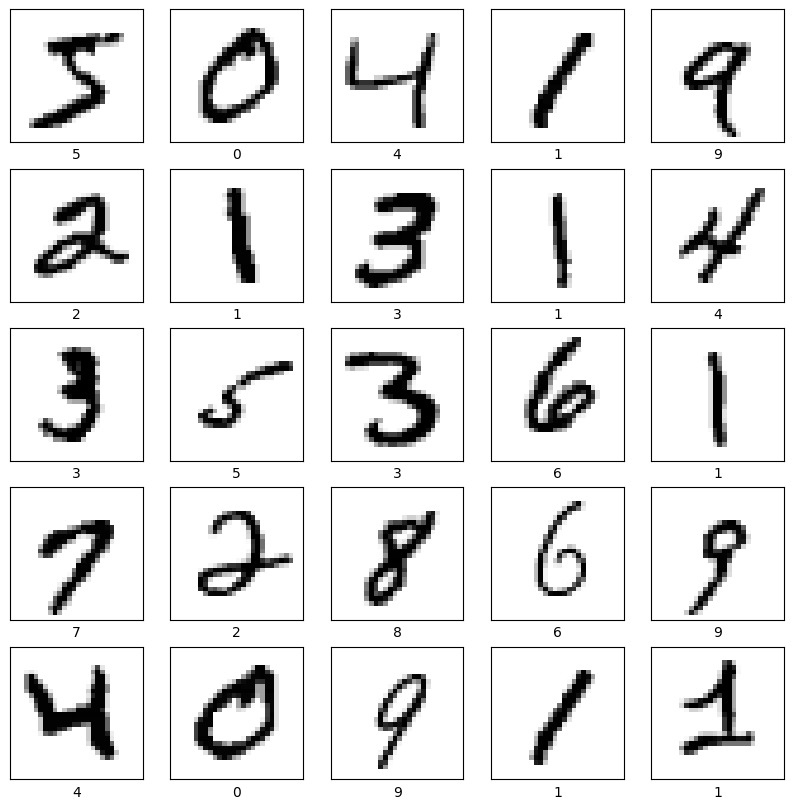

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Added cmap for better visualization of MNIST
    # Display the label as a string
    plt.xlabel(str(train_labels[i]))
plt.show()

---
## **PART 4 - Model Selection and Training**

We now define the convolutional neural network that will classify the handwritten digits. The model begins with convolutional layers, which apply filters to detect patterns within the images. The first convolutional layer typically identifies edges or simple shapes, while the second learns more detailed features based on those initial patterns.

A max-pooling layer follows, reducing the spatial dimensions of the feature maps while keeping the most important information. This process decreases model complexity and helps prevent overfitting.

We repeated this structure two times and finished with another convolutional layer.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

After feature extraction, the output of the convolutional base is flattened into a single vector, which is passed into dense layers. These layers interpret the learned features and map them to one of the ten digit categories. The final dense layer uses a softmax activation to output a probability distribution over all classes.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Before training, we compile the model by specifying its optimizer, loss function, and evaluation metric.

- The **Adam optimizer** adjusts model weights efficiently during training.
- The **Sparse Categorical Crossentropy loss** is appropriate because our labels are integers rather than one-hot encoded vectors.
- We track **accuracy** to observe how well the model performs over time.

This configuration prepares the model for the learning process.


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training begins using the `fit()` function, where the model iterates over the training data for a specified number of epochs. With each epoch, the model updates its weights to reduce the loss and improve accuracy. The printed training history allows us to monitor the learning progress and confirm that the model is improving as expected.


In [9]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8948 - loss: 0.3384 - val_accuracy: 0.9800 - val_loss: 0.0596
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9845 - loss: 0.0509 - val_accuracy: 0.9863 - val_loss: 0.0393
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9904 - loss: 0.0325 - val_accuracy: 0.9890 - val_loss: 0.0359
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.9880 - val_loss: 0.0365
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9945 - loss: 0.0162 - val_accuracy: 0.9898 - val_loss: 0.0320
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9920 - val_loss: 0.0282
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9919 - val_loss: 0.0277
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9968 - loss: 0.00

---
## **PART 5 - Model Testing**

After training, we evaluate the model on the test set to measure how well it generalizes to unseen data. The test accuracy and loss provide an objective assessment of final model performance.


313/313 - 2s - 8ms/step - accuracy: 0.9923 - loss: 0.0277


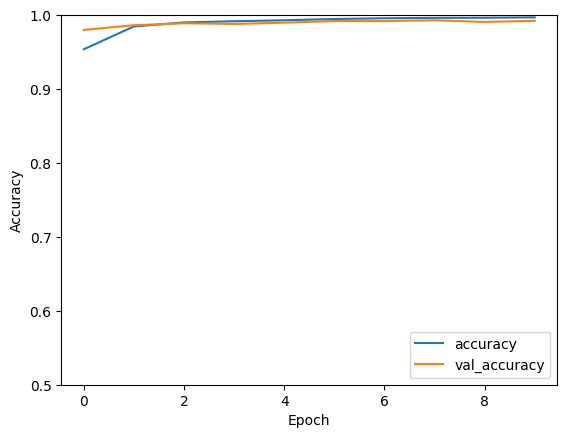

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.9922999739646912


We also use the trained network to make predictions on individual test images. By comparing a predicted label with the true label and visualizing the image, we gain insight into how the network interprets handwritten digits and how confident it is in its classification. This final step helps confirm that the model is behaving as expected.

In [12]:
predictions = model.predict(test_images)

x = predictions[0].argmax()
y = test_labels[0]
print("The network says the image is class " + str(x) + " and the actual class is: " + str(y))

x = predictions[10].argmax()
y = test_labels[10]
print("The network says the image is class " + str(x) + " and the actual class is: " + str(y))

x = predictions[20].argmax()
y = test_labels[20]
print("The network says the image is class " + str(x) + " and the actual class is: " + str(y))

x = predictions[30].argmax()
y = test_labels[30]
print("The network says the image is class " + str(x) + " and the actual class is: " + str(y))

x = predictions[40].argmax()
y = test_labels[40]
print("The network says the image is class " + str(x) + " and the actual class is: " + str(y))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
The network says the image is class 7 and the actual class is: 7
The network says the image is class 0 and the actual class is: 0
The network says the image is class 9 and the actual class is: 9
The network says the image is class 3 and the actual class is: 3
The network says the image is class 1 and the actual class is: 1
